In [1]:
# Задание 1 ЦПТ для различных распределений


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell
import math
rv = maxwell()
sample = rv.rvs(50)
print (sample)
sample.dtype


[2.83820721 1.98594618 1.07892258 0.95062545 1.02943356 0.99452922
 1.35495821 1.2605965  1.23493021 0.77879434 1.76379317 2.65369259
 1.60507398 2.05278213 1.78902201 0.80473374 1.4606144  2.84154765
 1.00762372 1.81648844 2.19911089 0.45919496 1.56651347 3.02604783
 2.27251511 2.41808535 0.83864303 2.47902539 0.84101322 0.56392648
 1.40125403 1.7612924  1.03304836 1.48323522 0.76549245 0.72392438
 2.22731622 1.86162705 1.88603861 2.85610991 1.08037058 2.28091971
 1.06043917 2.19033122 2.51959284 1.69573622 0.94027763 2.10953288
 1.94837819 2.31358211]


dtype('float64')

In [2]:
real_mean = rv.mean() # настоящее среднее случайной величины
print ('Настоящее среднее случайной величины')
print (real_mean)


Настоящее среднее случайной величины
1.5957691216057308


In [3]:
real_var = rv.var() 
print ('Настоящая дисперсия случайной величины')
print (real_var)


Настоящая дисперсия случайной величины
0.45352091052967447


Выборочное среднее
1.6420978044407095
Выборочная дисперсия
0.46577657527358746


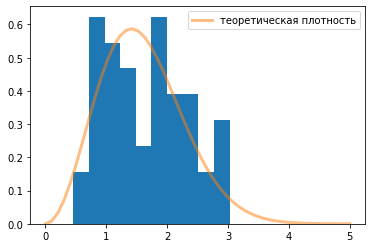

In [8]:
# Постройте гистограмму выборки и теоретическую плотность распределения

plt.hist(sample, density=True)
x = np.linspace(0,5,50)
pdf = rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5, linewidth='3')
plt.legend()

sample_mean = sample.mean() # выборочное среднее
print ('Выборочное среднее')
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print ('Выборочная дисперсия')
print(sample_var)


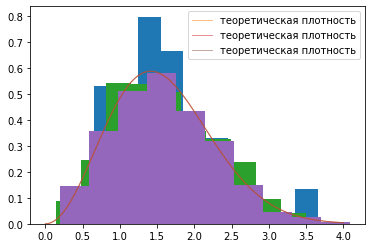

In [15]:

Kol = [50, 500, 1500]
for N in Kol:
    samplen = rv.rvs(N)
    plt.hist(samplen, density=True)
    x = np.linspace(0,4,150)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5, linewidth='1')
    plt.legend()



In [ ]:
# Для выбранного распределения апроксимация распределения выборочного среднего работает хорошо  

In [24]:
# Доверительный интервал на основе ЦПТ

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts 
import statsmodels.stats.weightstats as ssw
data = pd.read_csv('telecom_churn.csv')
df = pd.DataFrame(data) 
N = 30

In [25]:
# Данные по "неушедшим абонентам:"

mask = df['churn'].values == False
df_new = df[mask]

In [27]:
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(df_new['total day calls']) - 1.96 * np.std(df_new['total day calls'], ddof=1)/ np.sqrt(N), np.mean(df_new['total day calls']) + 1.96 * np.std(df_new['total day calls'], ddof=1)/ np.sqrt(N))) 

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [93.19740488096349, 107.3689109085102] 


In [33]:
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
sts.norm.interval(alpha=0.95, loc=np.mean(df_new['total day calls']), 
                  scale= np.std(df_new['total day calls'],                                                        
                  ddof=1)/ np.sqrt(N))))# alternative 'two-sided' only

Доверительный интервал для среднего по цпт интервальная оценка: (93.19753508333791, 107.36878070613578) 


In [29]:
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(df_new['total day calls']), std_mean=np.std(df_new['total day calls'], ddof=1)/np.sqrt(N), alpha=0.05, alternative='2s')
))

Доверительный интервал для среднего по цпт методом _zconfint_generic: (93.19753508333791, 107.36878070613578) 
